In [76]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
spotify_song_data= pd.read_csv("song_data.csv")

In [77]:
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [78]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [79]:
song_data.song_popularity= song_data.song_popularity.astype(float)
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)
song_data.key= song_data.key.astype(float)

song_data["popularity"]= [ 1 if i>=70 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    14384
1     4451
Name: popularity, dtype: int64

In [80]:
#drop the data we don't use
song_data.drop(["song_name"],axis=1,inplace=True)

In [81]:
#Linear Regression
from sklearn.linear_model import LinearRegression
a= np.array(song_data.loc[:,'loudness']).reshape(-1,1)
b = np.array(song_data.loc[:,'energy']).reshape(-1,1)
reg = LinearRegression()
predict_space = np.linspace(min(a), max(a)).reshape(-1,1)
reg.fit(a,b)
y_head = reg.predict(predict_space) 
print('R^2 score: ',reg.score(a, b))

R^2 score:  0.5708036795180886


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
a_train,a_test,b_train,b_test= train_test_split(a,b,test_size=0.2,random_state=42)

scores = cross_val_score(reg, a_train, b_train, cv = 5)
print("scores:",scores,"mean_scores:",np.mean(scores),"std_scores:",np.std(scores))
predictions = cross_val_predict(reg, a_test, b_test, cv = 5)
print(reg.score(a_test,b_test))

scores: [0.56944246 0.56240681 0.56031813 0.58129959 0.57847358] mean_scores: 0.5703881138238246 std_scores: 0.008371798617415518
0.5707706376235945


In [83]:
#Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

polynomial_reg=PolynomialFeatures(degree=3)
a_polynomial=polynomial_reg.fit_transform(a)

reg2 = LinearRegression()
reg2.fit(a_polynomial,b)
y_head2=reg2.predict(a_polynomial)
print('R^2 score: ',r2_score(b, y_head2))

R^2 score:  0.5910273217962392


In [84]:
# Multiple Linear Regression
y =np.array(song_data.loc[:,'song_popularity']).reshape(-1,1)
x_data=song_data.drop(["popularity"],axis=1)
x= (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
multiple_linear_reg= LinearRegression()
multiple_linear_reg.fit(x_train,y_train)
print("b0:",multiple_linear_reg.intercept_)
print("b1,b2:",multiple_linear_reg.coef_)

b0: [1.63424829e-13]
b1,b2: [[ 1.00000000e+02  1.86130802e-14  1.72830228e-14  3.34888551e-14
  -5.94222941e-16  7.97626820e-14  2.11903531e-15 -1.25831356e-14
  -2.05051871e-14 -1.51129367e-14 -6.50027861e-16 -1.55253702e-14
  -9.05412030e-15  4.22243890e-14]]


In [85]:
#drop the song_popularity column, otherwise model can be overfit.
song_data.drop(["song_popularity"],axis=1,inplace=True)

In [86]:
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (13, 15068)
x_test:  (13, 3767)
y_train:  (15068,)
y_test:  (3767,)


In [87]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

#  forward and backward_propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z= np.dot(w.T,x_train)+ b
    y_head= sigmoid(z)
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost= (np.sum(loss))/x_train.shape[1] 
    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]   
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients

# Update
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 1000 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

#Prediction
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.708830
Cost after iteration 1000: 0.798291
Cost after iteration 2000: 0.580176
Cost after iteration 3000: 2.052155
Cost after iteration 4000: 0.647250
Cost after iteration 5000: 2.147597
Cost after iteration 6000: 3.800633
Cost after iteration 7000: 0.992142
Cost after iteration 8000: 2.035938
Cost after iteration 9000: 4.211338


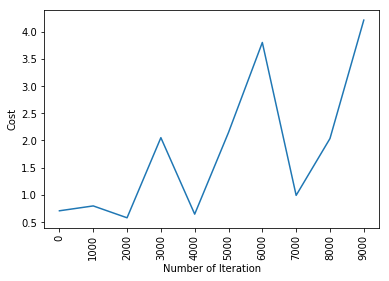

test accuracy: 76.63923546588798 %


In [93]:
# logistic_regression
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension) #initialize
    
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =8, num_iterations =10000)


In [89]:
## Sklearn with LR
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.765330501725511


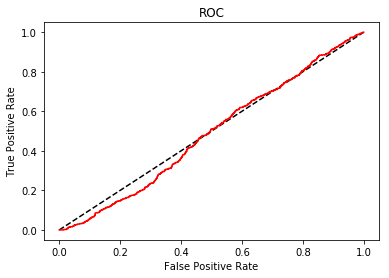

In [95]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [96]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)


Tuned hyperparameters : {'C': 0.001, 'penalty': 'l1'}
Best Accuracy: 0.7636529126213593


In [97]:
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
x= (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [98]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [120]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.1)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
#print('Ridge score: ',ridge.score(x_test,y_test))
print("Test accuracy:",root_mean_squared_error(y_test,ridge_predict))
Ridge_score= root_mean_squared_error(y_test,ridge_predict)

Test accuracy: 0.4126303381919766


In [100]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(song_data.loc[:,['danceability','energy','audio_valence','tempo','song_duration_ms','acousticness','instrumentalness','key','liveness','loudness','audio_mode','speechiness']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.2)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso coefficients: ',lasso.coef_)
print("Test accuracy:",root_mean_squared_error(y_test,lasso_predict))

Lasso coefficients:  [ 0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.]
Test accuracy: 0.41723753012000914


In [101]:
x= ['song_duration_ms', 'acousticness', 'danceability',
     'energy', 'instrumentalness', 'key', 'liveness',
     'loudness', 'audio_mode', 'speechiness', 'tempo', 
     'time_signature', 'audio_valence']
y= ['popularity']

In [102]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            x_train, x_test, y_train, y_test = train_test_split(data[x], 
                                                                data[y], 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(x_train, 
                                                         y_train).predict(x_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(x_train, 
                                                          y_train).predict(x_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [103]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models,song_data)

,OLS,Lasso,Ridge
0,0.054334,0.000034,0.054149
1,0.051706,-0.000379,0.052480


In [104]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(song_data[x], song_data[y]).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(song_data[x], song_data[y]).best_estimator_,}
test(models2,song_data)

,OLS,Lasso,Ridge
0,0.054155,0.022082,0.050980
1,0.052409,0.020762,0.050578


In [105]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [106]:
#KNN Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) accuracy is:  0.8388638173612954


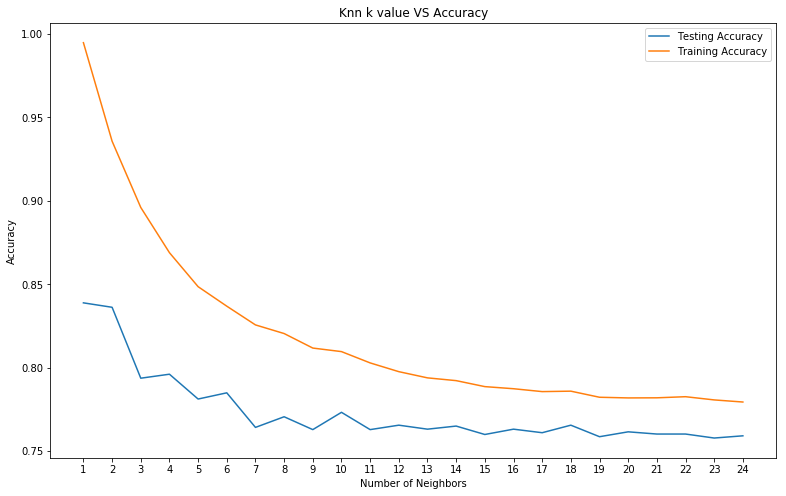

Best accuracy is 0.8388638173612954 with K = 1


In [107]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [108]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x,y)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.8225112821874171


In [109]:
# SVM
from sklearn.svm import SVC
svm= SVC(random_state=1)
svm.fit(x_train,y_train)
print("Accuracy of svm algo:",svm.score(x_test,y_test))

Accuracy of svm algo: 0.9187682505972923


In [110]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Test accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Test accuracy: 0.8141757366604725
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.1}


In [111]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Accuracy of naive bayes:",nb.score(x_test,y_test))

Accuracy of naive bayes: 0.7629413326254314


In [112]:
#Decision Tree Classifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Accuracy of decision tree:",dt.score(x_test,y_test))

Accuracy of decision tree: 0.8433766923281125


In [113]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state = 4)
rf.fit(x_train,y_train)
print("Accuracy of random forest",rf.score(x_test,y_test))
y_pred=rf.predict(x_test)
t_true=y_test

Accuracy of random forest 0.9232811255641094


In [114]:
#Confusion Matrix with Random Forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[2801   73]
 [ 283  610]]
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2874
           1       0.89      0.68      0.77       893

   micro avg       0.91      0.91      0.91      3767
   macro avg       0.90      0.83      0.86      3767
weighted avg       0.90      0.91      0.90      3767



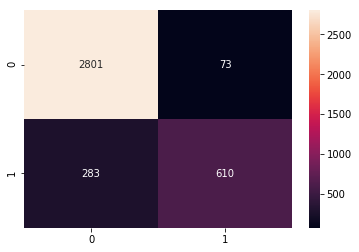

In [115]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

The most successful of all algorithm is Random Forest. The score is quite high. 
Since we set our threshold such that 80% of the songs in our dataset are named as not popular and 20% are named as popular, 
80% accuracy can be achieved by predicting all 0s. In order to capture this, we should consider the precision and recall values.
As we see in confusion matrix, model predicted “3502 unpopular” songs and “744 popular” songs correct.
- True negative:3502
- True positive:744
- False negative:357
- False Positive:106

In [118]:
Logistic_score=logreg_cv.best_score_
KKN_Score= max(test_accuracy)
SVM_score= svm.score(x_test,y_test)
Naive_bayes_score=nb.score(x_test,y_test)
DecisionTree_score=dt.score(x_test,y_test)
RandomForestClassifier_score=rf.score(x_test,y_test)
Lasso_Score=root_mean_squared_error(y_test,lasso_predict)

In [121]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors','LogisticRegession','NaiveBayes','Ridge','Lasso'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score,Logistic_score,Naive_bayes_score,Ridge_score,Lasso_Score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
2,DesicionTreeClassifier,0.971065
1,SVM,0.918768
0,RandomForestClassifier,0.905495
3,K-NearestNeighbors,0.838864
4,LogisticRegession,0.763653
5,NaiveBayes,0.762941
7,Lasso,0.425285
6,Ridge,0.412630


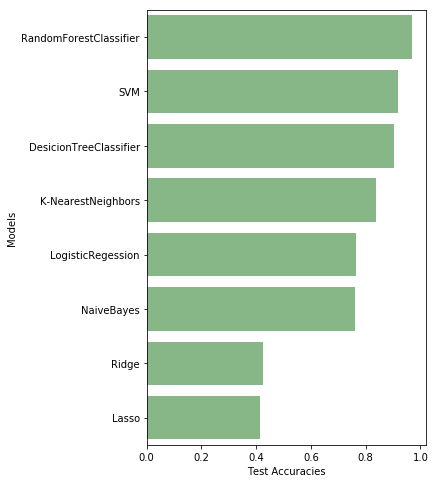

In [122]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()